CNN: Convolution Neural Network<br>

*   사물은 전체를 보지 않고 일부분만 본다
*   일부를 학습하고 사물의 한 부분만 봐도 알아 낼 수 있다.



---

* CNN BASIC
* conv2d layer
* max pooling layer



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 입력 이미지
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)
print(image)
print(image.shape) # (1, 3, 3, 1): (image개수, 행, 열, 1:흑백 | 3: RGB)

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


In [17]:
image.reshape(3,3)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

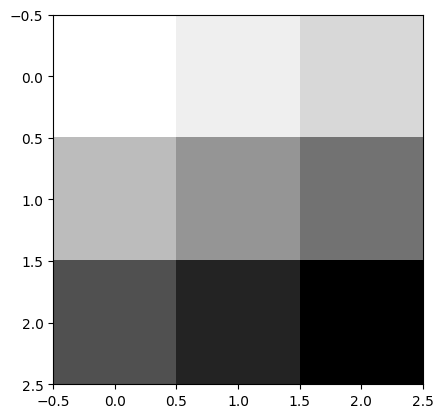

In [18]:
plt.imshow(image.reshape(3,3), cmap='Greys')
# Gray를 이용 0 ~ 9로 색의 진해기를 표현
# 0: 제일 밝음, 9: 제일 어두움 -> 상대값으로 표현

In [11]:
# conv2d: filter: (2, 2, 1, 1), straides: 1

# input 이미지: (1, 3, 3, 1)
#   1: 이미지 개수
#   3: 가로 크기
#   3: 세로 크기
#   1: 색상 Grey scale | 3: RGB

# filter: (2, 2, 1, 1)
#   2: 가로 크기
#   2: 세로 크기
#   1: 색상 Grey scale | 3: RGB
#   1: filter의 개수(출력 개수)

# (N - F) / strides + 1
#   출력 이미지: (3 - 2) / 1 + 1 = 2
#   (1, 3, 3, 1) ==> (1, 2, 2, 1)

In [22]:
# filter: (2, 2, 1, 1)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])

weight

<tf.Tensor: shape=(2, 2, 1, 1), dtype=float32, numpy=
array([[[[1.]],

        [[1.]]],


       [[[1.]],

        [[1.]]]], dtype=float32)>

In [23]:
#conv2d Layer

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="VALID")
conv2d

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)>

In [25]:
conv2d_image = conv2d.numpy()
print(conv2d_image)
print(conv2d_image.shape)

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


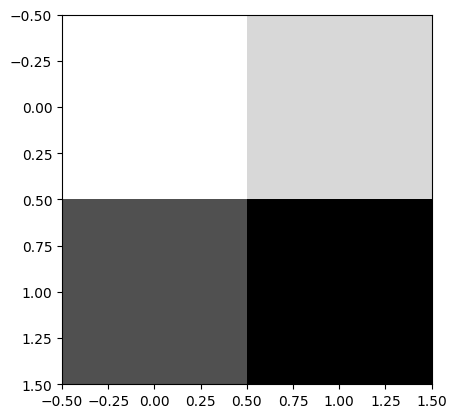

In [26]:
plt.imshow(conv2d_image.reshape(2,2), cmap='Greys')
plt.show()

In [ ]:
# 출력 이미지: (3 - 2) / 1 + 1 = 2, padding='SAME'
# filter: (2, 2, 1, 1), strides: 1
# (1, 3, 3, 1) ===> (1, 2, 2, 1)

In [31]:
# filter: (2, 2, 1, 1)
weight2 = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])

#conv2d Layer

conv2d_same = tf.nn.conv2d(image, weight2, strides=[1, 1, 1, 1], padding="SAME")
conv2d_same

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[12.],
         [16.],
         [ 9.]],

        [[24.],
         [28.],
         [15.]],

        [[15.],
         [17.],
         [ 9.]]]], dtype=float32)>

In [34]:
conv2d_image_same = conv2d_same.numpy()
print(conv2d_image_same.shape)

(1, 3, 3, 1)


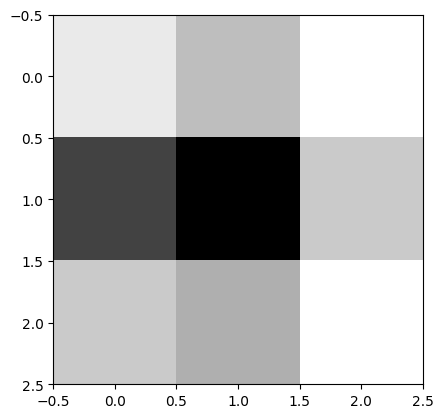

In [36]:
plt.imshow(conv2d_image_same.reshape(3, 3), cmap='Greys')
plt.show()